In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
df['Ram'] = df['Ram'].str.replace('kg', '')
df['Weight']=df['Weight'].str.replace('KG', '')

In [9]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float64')

ValueError: invalid literal for int() with base 10: '8GB'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


<Axes: xlabel='Price_euros', ylabel='Density'>

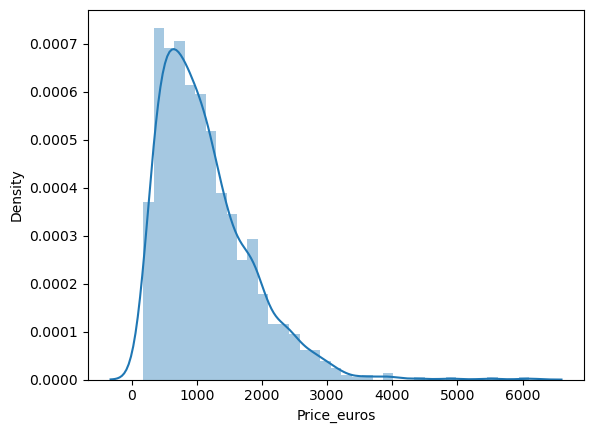

In [11]:
sns.distplot(df['Price_euros'])

<Axes: xlabel='Company'>

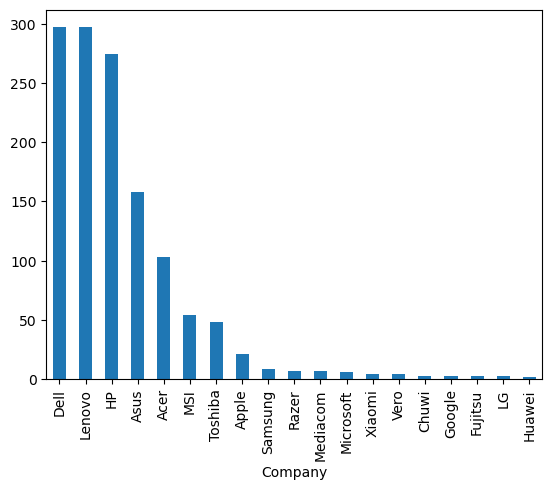

In [12]:
df['Company'].value_counts().plot(kind='bar')

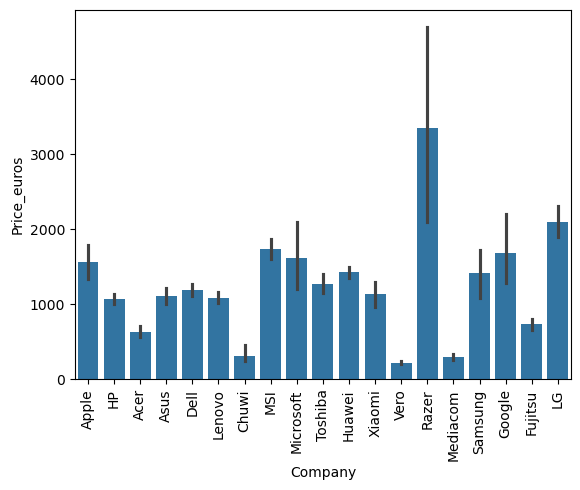

In [13]:
sns.barplot(x=df['Company'], y=df['Price_euros'])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='TypeName'>

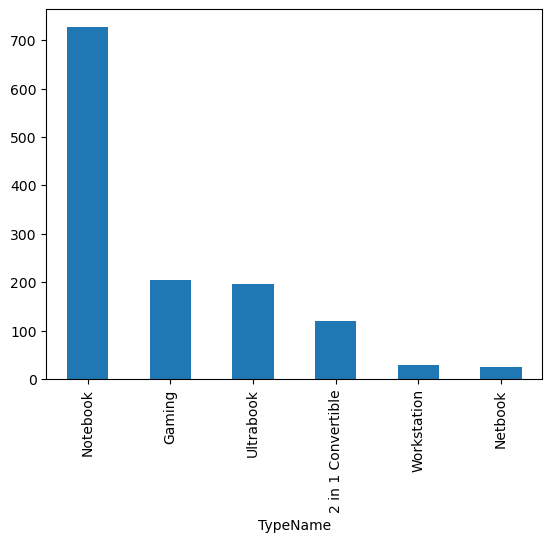

In [14]:
df['TypeName'].value_counts().plot(kind='bar')

ValueError: could not convert string to float: 'Inches'

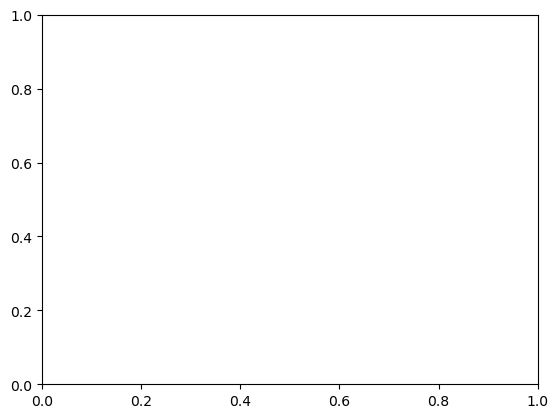

In [15]:
sns.distplot(["Inches"])
plt.show()

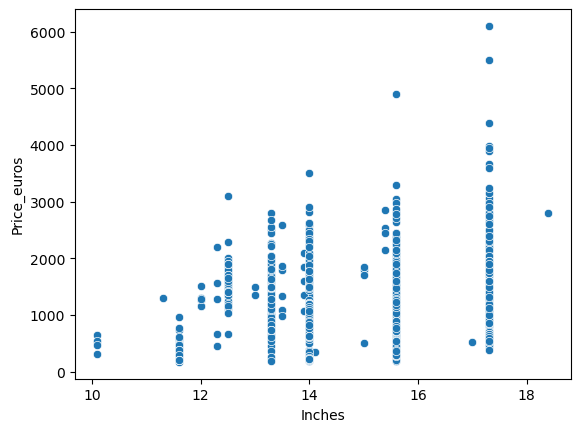

In [16]:
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])
plt.show()

In [17]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

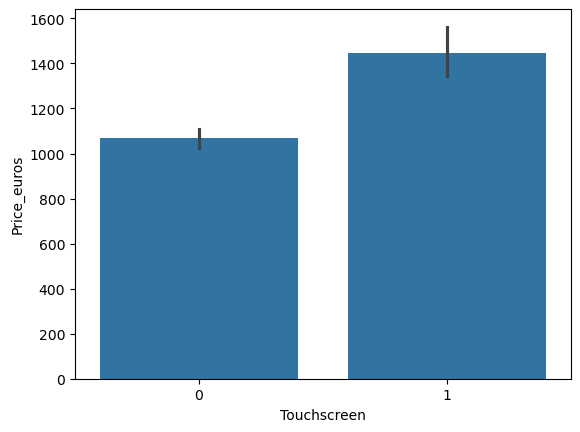

In [19]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [20]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

In [21]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0


<Axes: xlabel='IPS'>

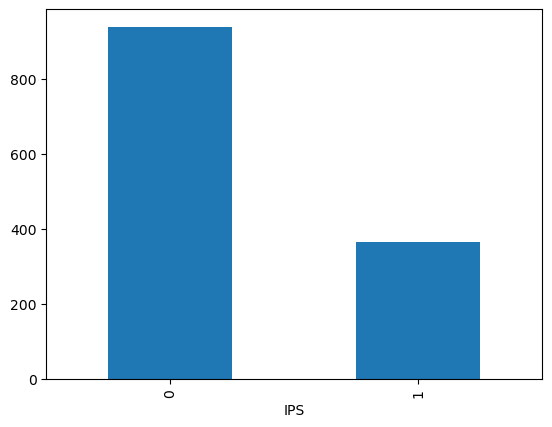

In [22]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price_euros'>

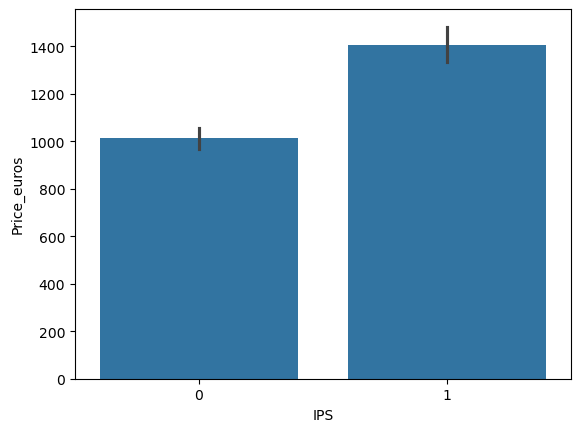

In [23]:
sns.barplot(x=df['IPS'],y=df['Price_euros'])

In [24]:
new = df['ScreenResolution'].str.split('x', n=1 , expand= True)

In [25]:
df['x_res']= new[0]
df['y_res']= new[1]

In [26]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [27]:
df['x_res'] = df['x_res'].str.replace(',', '') \
                          .str.findall(r'(\d+\.?\d*)') \
                          .apply(lambda x: x[0] if x else None)


In [28]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1,1920,1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1,3200,1800
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,1366,768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,1366,768


In [29]:
df['y_res']=df['y_res'].astype('int')
df['x_res']=df['x_res'].astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Touchscreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
 15  x_res             1303 non-null   int32  
 16  y_res             1303 non-null   int32  


In [31]:
df.corr

<bound method DataFrame.corr of       laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3       

In [32]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5 / df['Inches'].astype('float'))

In [33]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1,1920,1080,157.350512
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1,3200,1800,276.053530
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,1366,768,111.935204
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,1366,768,100.454670


In [34]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
df['Cpu name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [36]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1,1920,1080,157.350512,Intel Core i7
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1,3200,1800,276.053530,Intel Core i7
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,1366,768,111.935204,Intel Celeron Dual
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,1366,768,100.454670,Intel Core i7


In [37]:
def fetch_processor(text):
    if text == "Intel Core i5" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] =="Intel":
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [38]:
df['Cpu brand'] =df['Cpu name'].apply(fetch_processor)

In [39]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu name,Cpu brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624,Intel Core i7,Other Intel Processor
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1,1920,1080,157.350512,Intel Core i7,Other Intel Processor
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1,3200,1800,276.053530,Intel Core i7,Other Intel Processor
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,1366,768,111.935204,Intel Celeron Dual,Other Intel Processor
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,1366,768,100.454670,Intel Core i7,Other Intel Processor


<Axes: xlabel='Cpu brand', ylabel='Price_euros'>

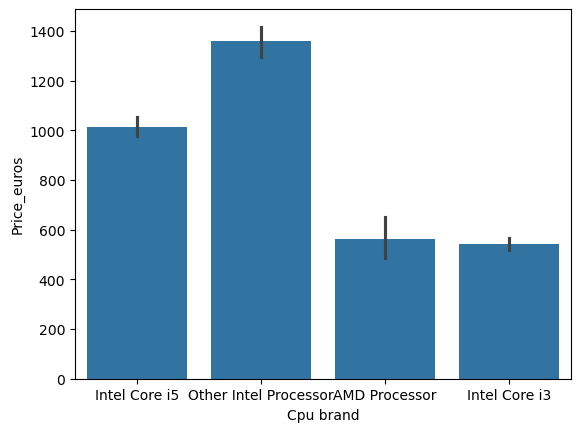

In [40]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])

In [41]:
df.drop(columns=['Cpu', 'Cpu name'], inplace=True)

In [42]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624,Other Intel Processor
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1,1920,1080,157.350512,Other Intel Processor
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1,3200,1800,276.053530,Other Intel Processor
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,1366,768,111.935204,Other Intel Processor
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,1366,768,100.454670,Other Intel Processor


<Axes: xlabel='Ram'>

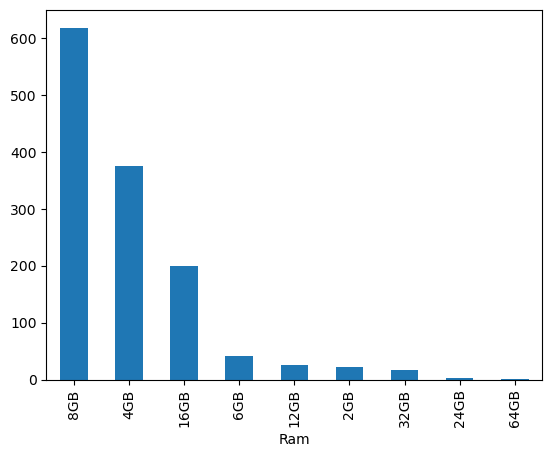

In [43]:
df['Ram'].value_counts().plot(kind='bar')

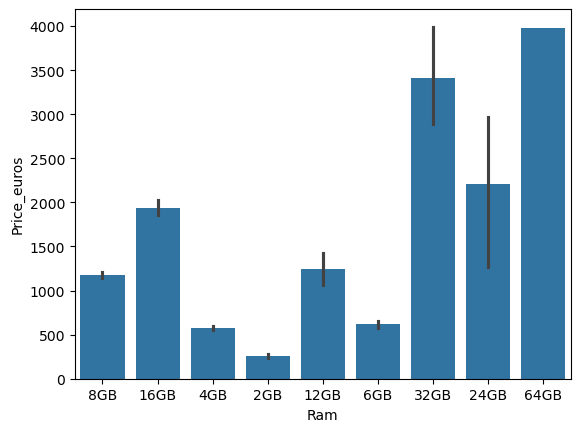

In [44]:
sns.barplot(x=df['Ram'], y=df['Price_euros'])
plt.show()

In [45]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [46]:
df.drop(columns=['Memory'], inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624,Other Intel Processor
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5


In [47]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True, errors='ignore')

In [48]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [49]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu brand,Gpu brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800,220.534624,Other Intel Processor,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,1,1920,1080,157.350512,Other Intel Processor,Intel
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,1,3200,1800,276.053530,Other Intel Processor,Intel
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2GB,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,1366,768,111.935204,Other Intel Processor,Intel
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,1366,768,100.454670,Other Intel Processor,AMD


In [50]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [51]:
df = df[df['Gpu brand'] !='AMD']

In [52]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
ARM         1
Name: count, dtype: int64

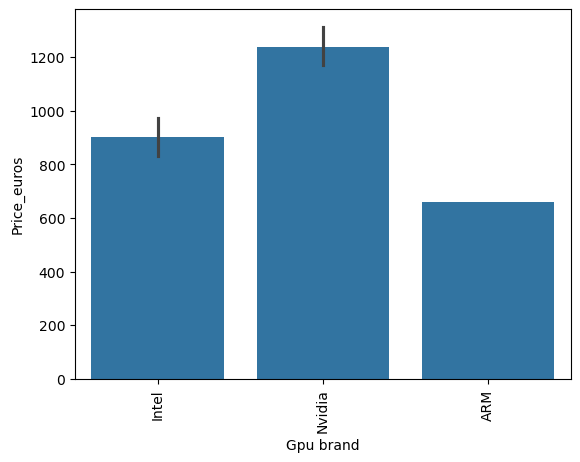

In [53]:
sns.barplot(x=df['Gpu brand'], y=df['Price_euros'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.drop(columns=['Gpu'], inplace=True)

In [55]:
df['OpSys'].value_counts()

OpSys
Windows 10      928
No OS            60
Windows 7        41
Linux            40
Chrome OS        27
macOS            10
Mac OS X          8
Windows 10 S      7
Android           2
Name: count, dtype: int64

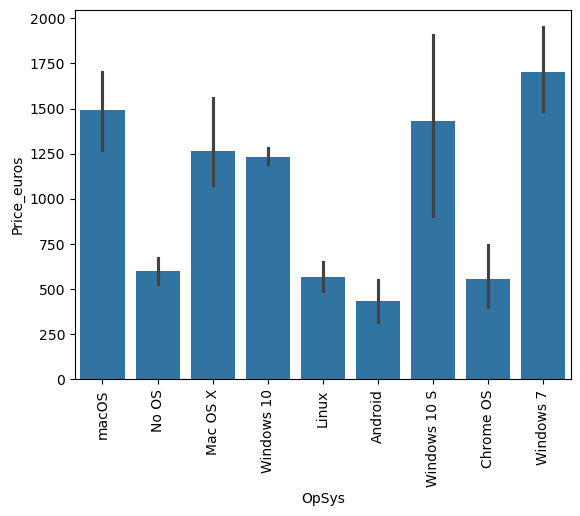

In [56]:
sns.barplot(x=df['OpSys'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp =='Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
            return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [58]:
df['os'] = df['OpSys'].apply(cat_os)

In [59]:
df.drop(columns=['OpSys'], inplace=True)

In [60]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu brand,Gpu brand,os
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5,Intel,Mac
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5,Intel,Mac
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5,Intel,Others/No OS/Linux
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5,Intel,Mac
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,2.04kg,2139.97,0,1,2880,1800,220.534624,Other Intel Processor,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,2.2kg,720.32,0,0,1366,768,100.454670,Other Intel Processor,Nvidia,Windows
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,1.8kg,638.00,1,1,1920,1080,157.350512,Other Intel Processor,Intel,Windows
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,1.3kg,1499.00,1,1,3200,1800,276.053530,Other Intel Processor,Intel,Windows
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2GB,1.5kg,229.00,0,0,1366,768,111.935204,Other Intel Processor,Intel,Windows


<Axes: xlabel='Weight', ylabel='Price_euros'>

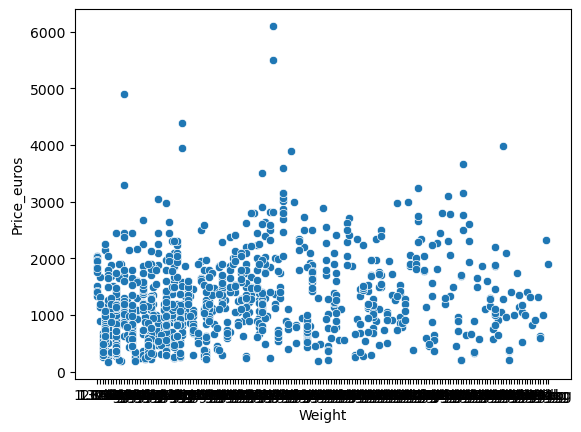

In [61]:
sns.scatterplot(x=df['Weight'], y=df['Price_euros'])

In [62]:
df['Price_euros'] = pd.to_numeric(df['Price_euros'], errors='coerce')
# Repeat for other numeric columns if necessary

In [63]:
df.drop(columns=['laptop_ID'], inplace=True)

In [64]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi,Cpu brand,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,1.37kg,1339.69,0,1,2560,1600,226.983005,Intel Core i5,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,1.34kg,898.94,0,0,1440,900,127.677940,Intel Core i5,Intel,Mac
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,1.86kg,575.00,0,0,1920,1080,141.211998,Intel Core i5,Intel,Others/No OS/Linux
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,1.37kg,1803.60,0,1,2560,1600,226.983005,Intel Core i5,Intel,Mac
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,2.04kg,2139.97,0,1,2880,1800,220.534624,Other Intel Processor,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,2.2kg,720.32,0,0,1366,768,100.454670,Other Intel Processor,Nvidia,Windows
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,1.8kg,638.00,1,1,1920,1080,157.350512,Other Intel Processor,Intel,Windows
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,1.3kg,1499.00,1,1,3200,1800,276.053530,Other Intel Processor,Intel,Windows
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2GB,1.5kg,229.00,0,0,1366,768,111.935204,Other Intel Processor,Intel,Windows


In [65]:
x = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [66]:
x

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Touchscreen,IPS,x_res,y_res,ppi,Cpu brand,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,1.37kg,0,1,2560,1600,226.983005,Intel Core i5,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8GB,1.34kg,0,0,1440,900,127.677940,Intel Core i5,Intel,Mac
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,1.86kg,0,0,1920,1080,141.211998,Intel Core i5,Intel,Others/No OS/Linux
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,1.37kg,0,1,2560,1600,226.983005,Intel Core i5,Intel,Mac
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,2.04kg,0,1,2880,1800,220.534624,Other Intel Processor,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,2.2kg,0,0,1366,768,100.454670,Other Intel Processor,Nvidia,Windows
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,1.8kg,1,1,1920,1080,157.350512,Other Intel Processor,Intel,Windows
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,1.3kg,1,1,3200,1800,276.053530,Other Intel Processor,Intel,Windows
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2GB,1.5kg,0,0,1366,768,111.935204,Other Intel Processor,Intel,Windows


In [67]:
y

0       7.200194
1       6.801216
2       6.354370
4       7.497540
6       7.668547
          ...   
1297    6.579696
1298    6.458338
1299    7.312553
1300    5.433722
1302    5.910797
Name: Price_euros, Length: 1123, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
print(x_train.head())
print(x_train.dtypes)

      Company              Product   TypeName  Inches  \
782   Toshiba      Tecra Z40-C-161  Ultrabook    14.0   
1201   Lenovo    IdeaPad 310-15ISK   Notebook    15.6   
230      Asus  Pro P2540UA-XO0198T   Notebook    15.6   
1209     Asus            Rog Strix     Gaming    15.6   
1027       HP          ProBook 640   Notebook    14.0   

                 ScreenResolution   Ram  Weight  Touchscreen  IPS  x_res  \
782   IPS Panel Full HD 1920x1080  16GB  1.47kg            0    1   1920   
1201                     1366x768   8GB   2.2kg            0    0   1366   
230                      1366x768   4GB  2.37kg            0    0   1366   
1209            Full HD 1920x1080  16GB   2.2kg            0    0   1920   
1027                     1366x768   4GB  1.95kg            0    0   1366   

      y_res         ppi              Cpu brand Gpu brand                  os  
782    1080  157.350512  Other Intel Processor    Nvidia             Windows  
1201    768  100.454670  Other Intel Proce

In [77]:
# Print the shape and column names
print("Shape of x_train:", x_train.shape)
print("Columns in x_train:", x_train.columns)


Shape of x_train: (898, 15)
Columns in x_train: Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Ram',
       'Weight', 'Touchscreen', 'IPS', 'x_res', 'y_res', 'ppi', 'Cpu brand',
       'Gpu brand', 'os'],
      dtype='object')


In [78]:
# Check for non-numeric entries in your features
non_numeric = x_train[~x_train.applymap(lambda x: isinstance(x, (int, float)))]
print("Non-numeric entries in x_train:", non_numeric)


Non-numeric entries in x_train:       Company                           Product            TypeName  Inches  \
782   Toshiba                   Tecra Z40-C-161           Ultrabook     NaN   
1201   Lenovo                 IdeaPad 310-15ISK            Notebook     NaN   
230      Asus               Pro P2540UA-XO0198T            Notebook     NaN   
1209     Asus                         Rog Strix              Gaming     NaN   
1027       HP                       ProBook 640            Notebook     NaN   
...       ...                               ...                 ...     ...   
563    Lenovo                      Thinkpad P71            Notebook     NaN   
156    Lenovo                    Yoga 520-14IKB  2 in 1 Convertible     NaN   
1211     Asus  FX502VM-AS73 (i7-7700HQ/16GB/1TB            Notebook     NaN   
1268       HP                  Stream 11-Y000na             Netbook     NaN   
1006       HP                       ProBook 640            Notebook     NaN   

                   

In [80]:
# Check if y_train and y_test are defined and their shapes
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (898,)
y_test shape: (225,)


In [81]:
# Check data types of x_train
print(x_train.dtypes)


Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Ram                  object
Weight               object
Touchscreen           int64
IPS                   int64
x_res                 int32
y_res                 int32
ppi                 float64
Cpu brand            object
Gpu brand            object
os                   object
dtype: object


In [82]:
# Convert specified columns to strings to ensure proper encoding
for col in [0, 1, 7, 10, 11]:  # Update these indices based on your dataset
    x_train.iloc[:, col] = x_train.iloc[:, col].astype(str)
    x_test.iloc[:, col] = x_test.iloc[:, col].astype(str)


In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Create the ColumnTransformer
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])  # Update indices as needed
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Function to fit and evaluate a model
def fit_and_evaluate(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('step1', step1),
        ('step2', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    return {
        'R² score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Ensure y_train and y_test are defined and not None
# Replace these with your actual data
results = {}
# Example: assuming y_train and y_test are properly defined
# results['Linear Regression'] = fit_and_evaluate(LinearRegression(), x_train, y_train, x_test, y_test)

# Uncomment above line and repeat for other models as needed


In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Example DataFrame setup (replace this with your actual data)
data = {
    'Category': ['Ultrabook', 'Gaming', 'Ultrabook', 'Desktop'],
    'Brand': ['Dell', 'HP', 'Lenovo', 'Apple'],
    'Processor': ['i5', 'i7', 'i9', 'i3'],
    'RAM': [8, 16, 32, 4],
    'Storage': [512, 1000, 2000, 256],
    'Price': [800, 1200, 1500, 600]
}

df = pd.DataFrame(data)

# Define features and target
X = df[['Category', 'Brand', 'Processor', 'RAM', 'Storage']]
y = df['Price']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ColumnTransformer with handle_unknown set to 'ignore'
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 2])  # Update indices as needed
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Function to fit and evaluate a model
def fit_and_evaluate(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('step1', step1),
        ('step2', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    return {
        'R² score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Ensure y_train and y_test are defined and not None
results = {}

# Linear Regression
results['Linear Regression'] = fit_and_evaluate(LinearRegression(), x_train, y_train, x_test, y_test)

# Print the results
print(results)


{'Linear Regression': {'R² score': nan, 'MAE': 222.02647916652882}}


In [86]:
print(x_train.isnull().sum())
print(y_train.isnull().sum())


Category     0
Brand        0
Processor    0
RAM          0
Storage      0
dtype: int64
0


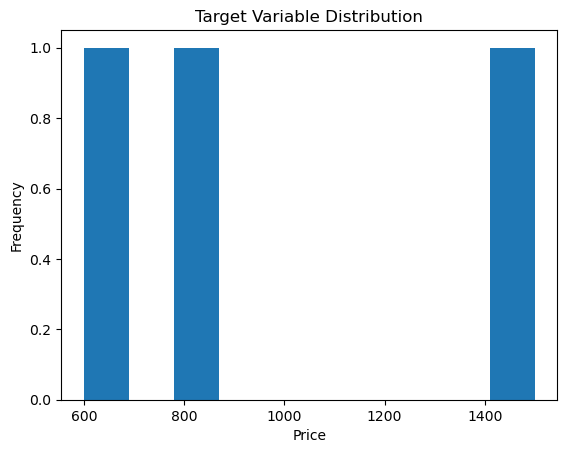

In [87]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=10)
plt.title('Target Variable Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
